## Imports

In [ ]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import TensorDataset
import torch.nn.functional as F
import torch.optim as optim

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
from tqdm import tqdm
import glob
import cv2
import os
import pickle

from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/DL/Asgn3/"

/content/drive/.shortcut-targets-by-id/1PkiHI4OJA3yrdlW8ucyrpwKEA0BegCvE/DL/Asgn3


In [ ]:
label_encodings = {0 : "Not paraphrase", 1 : "Paraphrase"}

## Data Processing

In [ ]:
train_df=pd.read_csv("PARADE_train.txt", sep='\t', engine='python')  # Loading train.csv in pandas Dataframe
test_df=pd.read_csv("PARADE_test.txt", sep='\t', engine='python')  # Loading test.csv in pandas Dataframe
val_df=pd.read_csv("PARADE_validation.txt", sep='\t', engine='python')  # Loading test.csv in pandas Dataframe
print(train_df.shape)
print(test_df.shape)
val_df

(7550, 5)
(1357, 5)


,Four-class labels,Binary labels,Entity,Definition1,Definition2
0,1,0,time interval,time elapsed between clock readings,math symbol: Δt (delta t)
1,1,0,time interval,how much time it takes for something to happen...,"elapsed time, or the time that has gone by"
2,1,0,intelligent agents,a knowledge based system that acts on a user's...,-special purpose knowledge based info system ...
3,0,0,intelligent agents,these use built-in and learned knowledge to ma...,programs that work in the background without d...
4,2,1,intelligent agents,software programs that use a built-in or learn...,programs that work in the background without d...
...,...,...,...,...,...
1270,2,1,architectural design,concerned with the general structure of the so...,"overall structure of the system, how system sh..."
1271,0,0,architectural design,how a software system should be organized and ...,once the interactions between the software sys...
1272,3,1,architectural design,first set of activities in the up's design dis...,the process that selects and describes the exa...
1273,3,1,architectural design,where you identify the overall structure of th...,where you identify the structure of the system...


In [ ]:
train_df = train_df.drop(["Four-class labels", "Entity"], axis = 1)
test_df = test_df.drop(["Four-class labels", "Entity"], axis = 1)
val_df = val_df.drop(["Four-class labels", "Entity"], axis = 1)
print(train_df.shape)
print(test_df.shape)
val_df

(7550, 3)
(1357, 3)


,Binary labels,Definition1,Definition2
0,0,time elapsed between clock readings,math symbol: Δt (delta t)
1,0,how much time it takes for something to happen...,"elapsed time, or the time that has gone by"
2,0,a knowledge based system that acts on a user's...,-special purpose knowledge based info system ...
3,0,these use built-in and learned knowledge to ma...,programs that work in the background without d...
4,1,software programs that use a built-in or learn...,programs that work in the background without d...
...,...,...,...
1270,1,concerned with the general structure of the so...,"overall structure of the system, how system sh..."
1271,0,how a software system should be organized and ...,once the interactions between the software sys...
1272,1,first set of activities in the up's design dis...,the process that selects and describes the exa...
1273,1,where you identify the overall structure of th...,where you identify the structure of the system...


In [ ]:
train_counts = train_df["Binary labels"].value_counts()
test_counts = test_df["Binary labels"].value_counts()
val_counts = val_df["Binary labels"].value_counts()

In [ ]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n( {:d} )".format(pct, absolute)

## Visualising Data

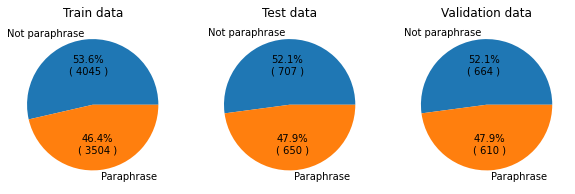

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,10))
ax1.pie(train_counts.values, autopct = lambda pct: func(pct, train_counts.values), labels=label_encodings.values())
ax1.set_title("Train data")

ax2.pie(test_counts.values, autopct = lambda pct: func(pct, test_counts.values), labels=label_encodings.values())
ax2.set_title("Test data")

ax3.pie(test_counts.values, autopct = lambda pct: func(pct, val_counts.values), labels=label_encodings.values())
ax3.set_title("Validation data")

plt.show()

In [ ]:
train_df.values

array([[1,
        'predictive models are involved with predicting a value based on other values in the dataset. the process of training a predictive model is known as supervised learning.',
        'predict a value based on other values in the dataset. process of training a pred model is supervised learning.'],
       [1,
        'predict a value based on other values in the dataset. process of training a pred model is supervised learning.',
        'involved with predicting a value based on other values in the dataset; process of training this type of model is known as supervised learning'],
       [1,
        'predicting one value (the target variable) using other values',
        'predictive models are involved with predicting a value based on other values in the dataset.'],
       ...,
       [1,
        'calculates the shortest route from a source to a destination through a network and is restricted to follow a linear network',
        'network analysis is used in many different 

In [ ]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 5.3 MB/s 
     |████████████████████████████████| 596 kB 43.1 MB/s 
     |████████████████████████████████| 6.6 MB 29.8 MB/s 
     |████████████████████████████████| 895 kB 43.5 MB/s 
     |████████████████████████████████| 77 kB 5.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## Tokenising Data

In [ ]:
from transformers import DistilBertTokenizerFast, DistilBertModel

In [ ]:
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased') ## to tokenise input to send to Distil=bert model


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
train_encoding=tokenizer(train_df[['Definition1','Definition2']].values.tolist(),truncation=True,padding=True,return_tensors="pt")
val_encoding=tokenizer(val_df[['Definition1','Definition2']].values.tolist(),truncation=True,padding=True,return_tensors="pt")
test_encoding=tokenizer(test_df[['Definition1','Definition2']].values.tolist(),truncation=True,padding=True,return_tensors="pt")

In [ ]:
class IMDbDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)


train_dataset = IMDbDataset(train_encoding,train_df['Binary labels'])
val_dataset = IMDbDataset(val_encoding,val_df['Binary labels'])
test_dataset = IMDbDataset(test_encoding,test_df['Binary labels'])


In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64)

In [ ]:
# i=0
for x in train_loader:
  print(x['input_ids'].shape)
  break
  

torch.Size([64, 154])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


## Model

In [ ]:
if torch.cuda.is_available():
  device=torch.device("cuda:0")
  print("Running GPU")
else :
  device= torch.device("cpu")
  print("Running CPU")

Running GPU


In [ ]:
model = DistilBertModel.from_pretrained('distilbert-base-uncased').to(device)
for param in model.parameters():
  param.requires_grad = False
net=Net(model).to(device)


Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## Plotting and Training Functions

In [ ]:
def plot_loss(train_loss, val_loss):
  plt.plot(range(len(train_loss)), train_loss, label = "Average Training  Loss " )
  plt.plot(range(len(val_loss)), val_loss, label = "Average Validation  Loss " )
  plt.xlabel('Epochs ')
  plt.ylabel('Loss')
  plt.title("Training loss and validation loss vs Epochs")
  plt.legend()
  plt.show()

In [ ]:
def loss_batch(model, loss_func,batch, opt=None):
    # batch=batch.to(device)
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    yb=batch['labels'].to(device).type(torch.float32)
    outputs = model(input_ids, attention_mask=attention_mask)
    outputs=outputs.type(torch.float32)
    # out = model(xb)
    loss = loss_func(outputs, yb)
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()  # Different from net.parameters as only parameters passed to optimizer get zero grad , but in our case we pass whole net parameters as Adam(net.parameters(),lr=00.1) thus same.
    return loss.item(), len(batch)#, acc

In [ ]:
def fit(epochs, model, train_dl, val_dl):
  opt = optim.Adam(model.parameters(),lr=0.00007)
  loss_func= nn.BCELoss()
  val_loss = []
  train_loss = []
  # train_accuracy = 0
  for epoch in tqdm(range(epochs),leave=True,position=0):
      model.train()
      train_losses, train_nums = [], []
      for batch in tqdm(train_dl,leave=True,position=1):
          losses_val, nums_val = loss_batch(model, loss_func, batch, opt)
          train_losses.append(losses_val)
          train_nums.append(nums_val)
      cur_train_loss = np.sum(np.multiply(np.array(train_losses), np.array(train_nums))) / np.sum(np.array(train_nums))
      train_loss.append(cur_train_loss)

      model.eval()
      with torch.no_grad():
          losses, nums = zip(
              *[loss_batch(model, loss_func,batch) for batch in val_dl]
          )
      cur_val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)
      val_loss.append(cur_val_loss)

      print(epoch, cur_val_loss)
  return  train_loss,val_loss

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
def accuracy(x_test, y_test, model):
  # y_train_temp = y_test.to("cpu").detach().numpy()
  model.eval()
  input_ids = x_test['input_ids']
  attention_mask = x_test['attention_mask']
  y_train_pred=[]
  for i in range(0,len(input_ids),2):
    inp=input_ids[i:i+2].to(device)
    atm=attention_mask[i:i+2].to(device)
    # print(inp.shape,atm.shape)
    zz= model(inp, attention_mask=atm).to("cpu").detach().numpy()
    # print(zz)
    y_train_pred+=list(zz)
  print(y_train_pred)
  for i in range(len(y_train_pred)):
    if y_train_pred[i] >= 0.5:
      y_train_pred[i] = 1
    else:
      y_train_pred[i] = 0
  train_acc = accuracy_score(y_test, y_train_pred)
  clr = classification_report(y_test, y_train_pred)
  f1_sc = f1_score(y_test, y_train_pred, average='weighted')
  print("The accuracy score is :", train_acc)
  print("The weighted F1_score is :", f1_sc)
  print("The classification report is :\n", clr)
  return train_acc, f1_sc

## Running the models

In [ ]:
train_loss, val_loss = fit(10, net, train_loader, val_loader)
plot_loss(train_loss, val_loss)
# accuracy(x_test, y_test, model_he)

In [ ]:
accuracy(test_encoding,np.array(test_df['Binary labels'].values),net)

In [ ]:
# with open('part3_pkl_without_attention', 'wb') as files:
#     pickle.dump(net, files)

# # load saved model
# # with open('model_pkl' , 'rb') as f:
# #     lr = pickle.load(f)

In [ ]:
# torch.save(net.state_dict(), "part3_torch_without_attention")
# ##loading data
# # model = TheModelClass(*args, **kwargs)
# # model.load_state_dict(torch.load(PATH))
# # model.eval()

In [ ]:
import math
def attention(q, k, v, d_k, mask=None, dropout=None):    
  scores = torch.matmul(q, k.transpose(-2, -1)) /  math.sqrt(d_k)
  if mask is not None:
      mask = mask.unsqueeze(1)
      scores = scores.masked_fill(mask == 0, -1e9)
  scores = F.softmax(scores, dim=-1)

  if dropout is not None:
      scores = dropout(scores)
      
  output = torch.matmul(scores, v)
  return output

In [ ]:
class MultiHeadAttention(nn.Module):
    def __init__(self, heads, d_model, dropout = 0.3):
        super().__init__()
        
        self.d_model = d_model
        self.d_k = d_model // heads
        self.h = heads
        
        self.q_linear = nn.Linear(d_model, d_model)
        self.v_linear = nn.Linear(d_model, d_model)
        self.k_linear = nn.Linear(d_model, d_model)
        self.dropout = nn.Dropout(dropout)
        self.out = nn.Linear(d_model, d_model)
    
    def forward(self, q, k, v, mask=None):
        
        bs = q.size(0)
        
        # perform linear operation and split into h heads
        
        k = self.k_linear(k).view(bs, -1, self.h, self.d_k)
        q = self.q_linear(q).view(bs, -1, self.h, self.d_k)
        v = self.v_linear(v).view(bs, -1, self.h, self.d_k)
        
        # transpose to get dimensions bs * h * sl * d_model
       
        k = k.transpose(1,2)
        q = q.transpose(1,2)
        v = v.transpose(1,2)
        # calculate attention using function we will define next
        scores = attention(q, k, v, self.d_k, mask, self.dropout)
        
        # concatenate heads and put through final linear layer
        concat = scores.transpose(1,2).contiguous()\
        .view(bs, -1, self.d_model)
        
        output = self.out(concat)
    
        return output

In [ ]:
class Net (nn.Module) :
  def __init__ (self,transformer):
    super().__init__()
    # define the layers here
    self.transformer=transformer
    self.attention=nn.MultiheadAttention(768,1 ,batch_first=True,dropout=0.2)
    # self.attention=MultiHeadAttention(1, 768)
    # self.Key=nn.Linear(768, 400)
    # self.Query=nn.Linear(768,400)
    # self.Value=nn.Linear(768,400)
    # self.conv1=nn.Conv2d(3,3,9)   # assuming tmhat block A [9x9] means kernel is of size 9x9 , and keeping output channels as 3 only.
    # self.conv2=nn.Conv2d(3,3,6)     # gets 152 x 140 x 3 as image which is max pool by 2 x 2
    # self.conv3=nn.Conv2d(3,3,3)
    self.fc1=nn.Linear(768, 300)
    self.fc2=nn.Linear(300,100)
    self.fc3=nn.Linear(100,50)
    self.fc4=nn.Linear(50,1)
    # self.wt_init(weights)

  def forward(self,x,attention_mask):
    embed=self.transformer(x,attention_mask)
    last_hidden_states = embed.last_hidden_state
    # print(embed,"\n")
    # print(embed.shape)
    # print(last_hidden_states.shape)   # 16*154*768  word embeddings-> attention - > sentence embeddings 
    # q_h1 = self.Query(last_hidden_states)
    # k_h1 = self.Key(last_hidden_states)
    # v_h1 = self.Value(last_hidden_states)
    # print(q_h1.shape)
    attn_output,_ = self.attention(last_hidden_states,last_hidden_states,last_hidden_states)   # attn output is output after softmax(qK/E)*V vector , and attn_output_weights= softmax(qk/E) (which is for each word 154 len vector)
    #shape of attn_output = [16, 154, 768]
    # print(attn_output.shape)
    cls_vector=attn_output[:,0,:]  #16,768
    # print(cls_vector)
    # cls_vector=last_hidden_states[:,0,:]
    x = F.normalize(cls_vector)
    x=torch.tanh(self.fc1(x))
    # print("x")
    # print(x)
    x=torch.tanh(self.fc2(x))
    x=torch.tanh(self.fc3(x))
    x = F.normalize(x)
    # print(cls_vector.shape)
    x=torch.sigmoid(self.fc4(x))
    # x=F.max_pool2d(F.tanh(self.conv1(x)), (2,2))
    # x=F.max_pool2d(F.tanh(self.conv2(x)),(2,2))
    # x=F.max_pool2d(F.tanh(self.conv3(x)),(2,2))
    # x = F.normalize(x)
    # x = x.reshape(x.shape[0], -1)
    # x=torch.sigmoid(self.fc3(x))
    return x.view(-1)

  # def wt_init(self, weights):
  #   for m in self.modules():
  #     if(isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear)):
  #       # print(m.weight)
  #       if(weights == "zero"):
  #         nn.init.constant_(m.weight, 0)
  #         nn.init.constant_(m.bias, 0)
  #       elif(weights == "random"):
  #         nn.init.normal_(m.weight, mean=0, std=1.0)
  #         nn.init.constant_(m.bias, 0)
  #       elif(weights == "he"):
  #         nn.init.kaiming_uniform_(m.weight)
  #         nn.init.constant_(m.bias, 0)
  #       # print("\n")
  #       # print(m.weight)


In [ ]:
model2 = DistilBertModel.from_pretrained('distilbert-base-uncased').to(device)
for param in model2.parameters():
  param.requires_grad = False
net2=Net(model2).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/118 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys

  8%|▊         | 1/12 [01:23<15:14, 83.18s/it]

0 0.6960324555635452



 17%|█▋        | 2/12 [02:46<13:55, 83.51s/it]

1 0.6883055686950683



 25%|██▌       | 3/12 [04:09<12:27, 83.07s/it]

2 0.6834797978401184



 33%|███▎      | 4/12 [05:32<11:04, 83.09s/it]

3 0.6549142003059387



 42%|████▏     | 5/12 [06:54<09:39, 82.79s/it]

4 0.6471276611089707



 50%|█████     | 6/12 [08:16<08:14, 82.38s/it]

5 0.6550701588392258



 58%|█████▊    | 7/12 [09:38<06:50, 82.19s/it]

6 0.6305214613676071



 67%|██████▋   | 8/12 [11:00<05:29, 82.36s/it]

7 0.632241377234459



 75%|███████▌  | 9/12 [12:24<04:07, 82.60s/it]

8 0.6513367027044297



 83%|████████▎ | 10/12 [13:46<02:45, 82.66s/it]

9 0.6314258635044098



 92%|█████████▏| 11/12 [15:08<01:22, 82.41s/it]

10 0.6268945276737213



100%|██████████| 12/12 [16:31<00:00, 82.60s/it]

11 0.6446665614843369


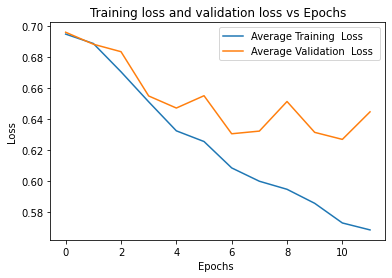

In [ ]:
train_loss, val_loss = fit(12, net2, train_loader, val_loader)
plot_loss(train_loss, val_loss)
# accuracy(x_test, y_test, model_he)

In [ ]:
accuracy(test_encoding,np.array(test_df['Binary labels'].values),net2)

[0.21415484, 0.7432307, 0.6939815, 0.5180338, 0.29758522, 0.6648322, 0.54662573, 0.30253175, 0.33907905, 0.2140907, 0.22367288, 0.6744392, 0.21746206, 0.21254429, 0.71976095, 0.7424626, 0.22822092, 0.21657844, 0.7434355, 0.2355733, 0.33117098, 0.2239885, 0.23739019, 0.22423802, 0.74445325, 0.34000227, 0.2790261, 0.2119963, 0.2186255, 0.22905526, 0.22158518, 0.21516444, 0.22043565, 0.7192654, 0.2130337, 0.2146206, 0.35527056, 0.21477188, 0.73659706, 0.7303523, 0.59004396, 0.340339, 0.24116278, 0.2420459, 0.21597329, 0.7436107, 0.2703824, 0.21378781, 0.21159634, 0.21600015, 0.74054146, 0.2338861, 0.37765747, 0.56126875, 0.28311703, 0.7422171, 0.27637315, 0.27729625, 0.6405486, 0.4566371, 0.37215397, 0.3111761, 0.7442919, 0.6590761, 0.23420498, 0.2717515, 0.39520243, 0.23539567, 0.22442193, 0.26939872, 0.2796223, 0.7303824, 0.21856654, 0.36501178, 0.7433233, 0.22143598, 0.7337545, 0.74443203, 0.22835186, 0.21382932, 0.74375373, 0.7444274, 0.5621871, 0.25367612, 0.6357952, 0.22020678, 0.34

(0.686072218128224, 0.6859022971655727)

In [ ]:
torch.save(net2.state_dict(), "net2_with_attention_70f1")
with open('net2_with_attention_70f1', 'wb') as files:
    pickle.dump(net2, files)

In [ ]:
model1 = DistilBertModel.from_pretrained('distilbert-base-uncased').to(device)
for param in model1.parameters():
  param.requires_grad = False
net1=Net(model1).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/118 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys

 10%|█         | 1/10 [00:45<06:49, 45.48s/it]

0 0.6731740981340408



 20%|██        | 2/10 [01:34<06:18, 47.29s/it]

1 0.6762421309947968



 30%|███       | 3/10 [02:21<05:30, 47.26s/it]

2 0.6598788648843765



 40%|████      | 4/10 [03:08<04:44, 47.42s/it]

3 0.6553345441818237



 50%|█████     | 5/10 [03:56<03:57, 47.52s/it]

4 0.6411381840705872



 60%|██████    | 6/10 [04:44<03:10, 47.50s/it]

5 0.6342193067073822



 70%|███████   | 7/10 [05:31<02:22, 47.54s/it]

6 0.6345052212476731



 80%|████████  | 8/10 [06:19<01:35, 47.59s/it]

7 0.6246491283178329



 90%|█████████ | 9/10 [07:06<00:47, 47.59s/it]

8 0.6342417806386947



100%|██████████| 10/10 [07:54<00:00, 47.45s/it]

9 0.630662351846695


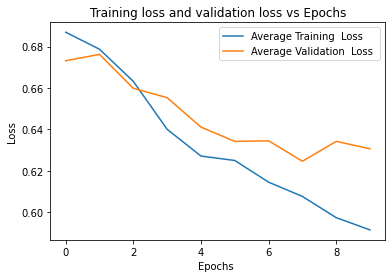

In [ ]:
train_loss, val_loss = fit(10, net1, train_loader, val_loader)
plot_loss(train_loss, val_loss)
# accuracy(x_test, y_test, model_he)

In [ ]:
accuracy(test_encoding,np.array(test_df['Binary labels'].values),net1)

[0.32013494, 0.70967, 0.6911926, 0.6654956, 0.35111335, 0.7071029, 0.6711457, 0.47115672, 0.34949794, 0.32233182, 0.32100704, 0.32729414, 0.32320875, 0.6985007, 0.71533674, 0.7197964, 0.71555585, 0.3228181, 0.69106805, 0.31900358, 0.32885095, 0.31958184, 0.3371149, 0.32099125, 0.71622795, 0.31880137, 0.32013634, 0.31864223, 0.31848642, 0.32981178, 0.3247721, 0.31925458, 0.32165092, 0.7002681, 0.35590172, 0.31915987, 0.7007558, 0.31846255, 0.65111905, 0.66741896, 0.62144685, 0.6645006, 0.33681402, 0.5828521, 0.34389758, 0.7203725, 0.573412, 0.699893, 0.7097713, 0.3520708, 0.6911769, 0.6774971, 0.71284044, 0.5175691, 0.33512062, 0.3244282, 0.504411, 0.35180786, 0.32052445, 0.612248, 0.66898733, 0.34352115, 0.7099965, 0.71311074, 0.3348209, 0.31875712, 0.3308235, 0.7122617, 0.3285612, 0.71779233, 0.71970683, 0.71763265, 0.7136019, 0.6800097, 0.7203101, 0.34671697, 0.71935457, 0.7199016, 0.48530245, 0.34282857, 0.72003573, 0.71695244, 0.71928847, 0.71679306, 0.7172183, 0.3402028, 0.7188033

(0.6624907885040531, 0.6571899848528812)

In [ ]:
with open('part3_pkl_with_attention', 'wb') as files:
    pickle.dump(net1, files)

# load saved model
# with open('model_pkl' , 'rb') as f:
#     lr = pickle.load(f)

In [ ]:
torch.save(net1.state_dict(), "part3_torch_with_attention")
##loading data
# model = TheModelClass(*args, **kwargs)
# model.load_state_dict(torch.load(PATH))
# model.eval()

In [ ]:
# for batch in train_loader:
#   input_ids = batch['input_ids'].to(device)
#   attention_mask = batch['attention_mask'].to(device)
#   yb=batch['labels'].to(device).type(torch.float32)
#   outputs = net1(input_ids, attention_mask=attention_mask)
#   break

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys


torch.Size([64, 154, 768])
tensor([[-0.0787, -0.0339,  0.0665,  ...,  0.0128,  0.1437,  0.0391],
        [-0.0806, -0.0378,  0.0707,  ...,  0.0098,  0.1451,  0.0098],
        [-0.0632, -0.0117,  0.0791,  ...,  0.0556,  0.1368, -0.0050],
        ...,
        [-0.0340, -0.0666,  0.0625,  ..., -0.0039,  0.1041, -0.0460],
        [-0.0408, -0.0803,  0.0583,  ..., -0.0022,  0.0918, -0.0663],
        [-0.0673, -0.0572,  0.0619,  ..., -0.0516,  0.1832, -0.0547]],
       device='cuda:0', grad_fn=<SliceBackward0>)
x
tensor([[ 0.0696,  0.0315, -0.0049,  ..., -0.0367, -0.0651,  0.0818],
        [ 0.0689,  0.0319, -0.0102,  ..., -0.0390, -0.0735,  0.0769],
        [ 0.0535,  0.0490, -0.0161,  ..., -0.0289, -0.0618,  0.0459],
        ...,
        [ 0.0574,  0.0416,  0.0015,  ..., -0.0251, -0.0545,  0.0377],
        [ 0.0551,  0.0430, -0.0007,  ..., -0.0205, -0.0695,  0.0317],
        [ 0.0148,  0.0303, -0.0095,  ..., -0.0167, -0.0765,  0.0293]],
       device='cuda:0', grad_fn=<TanhBackward0>)


In [ ]:
outputs

tensor([0.5311, 0.5318, 0.5351, 0.5320, 0.5318, 0.5307, 0.5317, 0.5364, 0.5368,
        0.5347, 0.5336, 0.5343, 0.5324, 0.5333, 0.5319, 0.5338, 0.5277, 0.5261,
        0.5270, 0.5288, 0.5270, 0.5292, 0.5282, 0.5263, 0.5279, 0.5344, 0.5380,
        0.5297, 0.5263, 0.5254, 0.5252, 0.5262, 0.5275, 0.5308, 0.5284, 0.5245,
        0.5268, 0.5238, 0.5263, 0.5264, 0.5280, 0.5276, 0.5277, 0.5273, 0.5292,
        0.5275, 0.5322, 0.5351, 0.5333, 0.5319, 0.5321, 0.5340, 0.5360, 0.5343,
        0.5333, 0.5348, 0.5363, 0.5324, 0.5320, 0.5313, 0.5339, 0.5341, 0.5350,
        0.5346], device='cuda:0', grad_fn=<ViewBackward0>)

## Q4. Freezing the embedding layers and fine tuning others

In [ ]:
model_some_freeze = DistilBertModel.from_pretrained('distilbert-base-uncased').to(device)
	  # We freeze here the embeddings of the model

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
for param in model_some_freeze.embeddings.parameters():
      param.requires_grad = False
cnt=0
for i in model_some_freeze.transformer.layer:
  cnt+=1
  for j in i.parameters():
    j.requires_grad = False
  if(cnt==4) : break

net_some_freeze=Net(model_some_freeze).to(device)

  0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys
 10%|█         | 1/10 [01:58<17:43, 118.17s/it]

0 0.6954807072877884


 20%|██        | 2/10 [03:56<15:45, 118.17s/it]

1 0.6880530178546905


 30%|███       | 3/10 [05:54<13:47, 118.20s/it]

2 0.6324862390756607


 40%|████      | 4/10 [07:52<11:48, 118.14s/it]

3 0.6105008244514465


 50%|█████     | 5/10 [09:50<09:50, 118.11s/it]

4 0.603881198167801


 60%|██████    | 6/10 [11:48<07:52, 118.09s/it]

5 0.5972024977207184


 70%|███████   | 7/10 [13:46<05:54, 118.05s/it]

6 0.5923707991838455


 80%|████████  | 8/10 [15:44<03:56, 118.00s/it]

7 0.5926065415143966


 90%|█████████ | 9/10 [17:42<01:57, 117.98s/it]

8 0.6029327899217606


100%|██████████| 10/10 [19:40<00:00, 118.05s/it]

9 0.5908952564001083


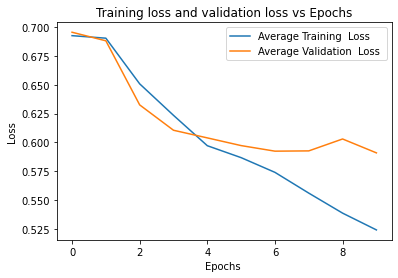

[0.27017426, 0.6959427, 0.735225, 0.515114, 0.2713699, 0.73671615, 0.4428548, 0.27126554, 0.27094257, 0.27013743, 0.27055907, 0.27098465, 0.27115393, 0.2702248, 0.67038727, 0.7398596, 0.7024556, 0.27053404, 0.385999, 0.27081656, 0.27045706, 0.27034166, 0.27751055, 0.27089226, 0.7398168, 0.27020776, 0.2707972, 0.27014792, 0.27057496, 0.41261816, 0.2704183, 0.27050257, 0.27082995, 0.29485926, 0.27068844, 0.27039993, 0.73982805, 0.27006686, 0.2734752, 0.3142989, 0.5349424, 0.6429794, 0.27384084, 0.5039606, 0.27058047, 0.73821026, 0.52471054, 0.26996532, 0.27105626, 0.2705194, 0.44786823, 0.27334628, 0.27076516, 0.73982626, 0.27068704, 0.27106488, 0.73711157, 0.27112585, 0.27054843, 0.2819414, 0.68313783, 0.27050135, 0.7397839, 0.73984104, 0.27098215, 0.27166924, 0.27119878, 0.3033893, 0.27028182, 0.58988786, 0.27010033, 0.38012806, 0.27022904, 0.53723407, 0.73936415, 0.27025598, 0.7396785, 0.7398535, 0.27041405, 0.27022725, 0.6758416, 0.73969567, 0.7398528, 0.6109545, 0.73950297, 0.270331

(0.6934414148857775, 0.6924916966679099)

In [ ]:
opt = optim.Adam(net_some_freeze.parameters(),lr=0.0001)
train_loss, val_loss = fit(10, net_some_freeze, train_loader, val_loader, opt)
plot_loss(train_loss, val_loss)
accuracy(test_encoding,np.array(test_df['Binary labels'].values),net_some_freeze)

In [ ]:
with open('part4_pkl_with_attention', 'wb') as files:
    pickle.dump(net_some_freeze, files)

# load saved model
# with open('model_pkl' , 'rb') as f:
#     lr = pickle.load(f)
torch.save(net_some_freeze.state_dict(), "part4_torch_with_attention")

In [ ]:
model_some_freeze_2 = DistilBertModel.from_pretrained('distilbert-base-uncased').to(device)
	  # We freeze here the embeddings of the model
for param in model_some_freeze_2.embeddings.parameters():
      param.requires_grad = False
cnt=0
for i in model_some_freeze_2.transformer.layer:
  cnt+=1
  for j in i.parameters():
    j.requires_grad = False
  if(cnt==4) : break

net_some_freez_2=Net(model_some_freeze_2).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/118 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys

 10%|█         | 1/10 [01:56<17:29, 116.64s/it]

0 0.6495112746953964



 20%|██        | 2/10 [03:53<15:33, 116.74s/it]

1 0.6207799255847931



 30%|███       | 3/10 [05:50<13:37, 116.75s/it]

2 0.6357193201780319



 40%|████      | 4/10 [07:47<11:40, 116.78s/it]

3 0.5978897690773011



 50%|█████     | 5/10 [09:43<09:44, 116.84s/it]

4 0.5919062823057175



 60%|██████    | 6/10 [11:40<07:47, 116.84s/it]

5 0.5918665066361427



 70%|███████   | 7/10 [13:37<05:50, 116.85s/it]

6 0.5995806694030762



 80%|████████  | 8/10 [15:34<03:53, 116.88s/it]

7 0.597587251663208



 90%|█████████ | 9/10 [17:31<01:56, 116.97s/it]

8 0.5993582710623742



100%|██████████| 10/10 [19:28<00:00, 116.86s/it]

9 0.595863687992096


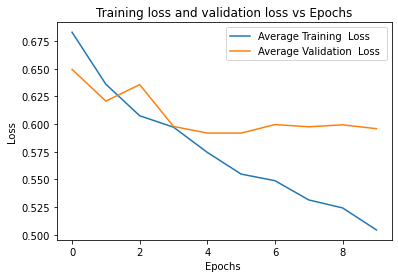

[0.27228835, 0.70990056, 0.71257037, 0.6968389, 0.27770257, 0.7125224, 0.7089614, 0.34635952, 0.27436393, 0.2722862, 0.27228856, 0.27229142, 0.27249572, 0.27252805, 0.7128037, 0.71294934, 0.6396494, 0.27230656, 0.7103408, 0.27228817, 0.30022225, 0.27229348, 0.27337617, 0.27228677, 0.71291244, 0.27228978, 0.27229545, 0.2722988, 0.27229622, 0.27240795, 0.27497643, 0.2722952, 0.27228948, 0.3024185, 0.27228573, 0.27229813, 0.7098142, 0.2722879, 0.67784506, 0.70843714, 0.7124795, 0.7045133, 0.5019971, 0.695279, 0.27229217, 0.7105766, 0.28342584, 0.27256852, 0.27229014, 0.27229208, 0.6339276, 0.2747595, 0.27427897, 0.7126526, 0.2722989, 0.27229026, 0.27233046, 0.27229455, 0.27229172, 0.69675475, 0.712246, 0.27229553, 0.7128517, 0.7127788, 0.2722907, 0.27229932, 0.27248868, 0.7071191, 0.27230316, 0.71235317, 0.7119807, 0.47332817, 0.2761759, 0.27237052, 0.6996156, 0.27228603, 0.7113335, 0.7129226, 0.6680958, 0.27228612, 0.7111606, 0.70235586, 0.286247, 0.71238387, 0.7124286, 0.27287614, 0.712

(0.7030213706705969, 0.7029004337197505)

In [ ]:
train_loss, val_loss = fit(10, net_some_freez_2, train_loader, val_loader)
plot_loss(train_loss, val_loss)
accuracy(test_encoding,np.array(test_df['Binary labels'].values),net_some_freez_2)

In [ ]:
torch.save(net_some_freez_2.state_dict(), "net2_with_attention_70f1_final")


In [ ]:
with open('net2_with_attention_70f1_final_pkl', 'wb') as files:
    pickle.dump(net_some_freez_2, files)

In [ ]:
def diff(x_test, y_test, model):
  model.eval()
  input_ids = x_test['input_ids']
  attention_mask = x_test['attention_mask']
  y_train_pred=[]
  for i in range(0,len(input_ids),2):
    inp=input_ids[i:i+2].to(device)
    atm=attention_mask[i:i+2].to(device)
    # print(inp.shape,atm.shape)
    zz= model(inp, attention_mask=atm).to("cpu").detach().numpy()
    # print(zz)
    y_train_pred+=list(zz)
  for i in range(len(y_train_pred)):
    if y_train_pred[i] >= 0.5:
      y_train_pred[i] = 1
    else:
      y_train_pred[i] = 0
  lst = []
  for i in range(len(y_test)):
    if(y_test[i] != y_train_pred[i]):
      # print(i)
      lst.append(i)
    if(len(lst) == 2):
      break
  return lst

In [ ]:
lst1 = diff(test_encoding,np.array(test_df['Binary labels'].values),net_some_freez_2)

In [ ]:
lst1

[1, 3]

In [ ]:
print(test_df.iloc[lst1[0]].values)
print(test_df.iloc[lst1[1]].values)

[0
 '-any data that the program receives while it is running -from file or user input -is typically &"un-meaningful&" until &"processed&" -data that is typed on a keyboard'
 'the data values that are scanned by a program']
[0 "vulnerability exists but wasn't detected by vulnerability scanner"
 'an error in which you are not alerted to a situation when you should be alerted due to which, you miss crucial things.']


In [ ]:
model_some_freeze_2 = DistilBertModel.from_pretrained('distilbert-base-uncased').to(device)
	  # We freeze here the embeddings of the model
for param in model_some_freeze_2.embeddings.parameters():
      param.requires_grad = False
cnt=0
for i in model_some_freeze_2.transformer.layer:
  cnt+=1
  for j in i.parameters():
    j.requires_grad = False
  if(cnt==4) : break

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/118 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys

  7%|▋         | 1/15 [01:56<27:16, 116.92s/it]

0 0.6788379371166229



 13%|█▎        | 2/15 [03:53<25:19, 116.90s/it]

1 0.6383160501718521



 20%|██        | 3/15 [05:50<23:23, 116.96s/it]

2 0.6145471572875977



 27%|██▋       | 4/15 [07:47<21:26, 116.94s/it]

3 0.6025398164987564



 33%|███▎      | 5/15 [09:44<19:29, 116.95s/it]

4 0.5958398818969727



 40%|████      | 6/15 [11:41<17:32, 116.99s/it]

5 0.6059644341468811



 47%|████▋     | 7/15 [13:39<15:37, 117.13s/it]

6 0.5921276479959487



 53%|█████▎    | 8/15 [15:36<13:40, 117.20s/it]

7 0.5875313818454743



 60%|██████    | 9/15 [17:33<11:43, 117.22s/it]

8 0.6044542461633682



 67%|██████▋   | 10/15 [19:31<09:46, 117.24s/it]

9 0.6282151252031326



 73%|███████▎  | 11/15 [21:28<07:48, 117.25s/it]

10 0.6082265719771385



 80%|████████  | 12/15 [23:25<05:51, 117.15s/it]

11 0.5875724300742149



 87%|████████▋ | 13/15 [25:22<03:54, 117.09s/it]

12 0.6235180988907814



 93%|█████████▎| 14/15 [27:19<01:57, 117.20s/it]

13 0.5890901938080788



100%|██████████| 15/15 [29:18<00:00, 117.25s/it]

14 0.5970146656036377


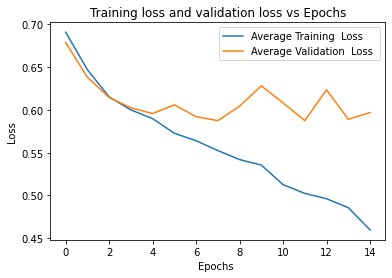

[0.23436019, 0.3024031, 0.7531073, 0.32575232, 0.23445113, 0.7526796, 0.35088947, 0.23597491, 0.2345073, 0.23463367, 0.23444133, 0.23580557, 0.23668234, 0.7419109, 0.7530618, 0.75303847, 0.7531107, 0.23720944, 0.53948206, 0.23449695, 0.23552166, 0.23618981, 0.2361004, 0.2345338, 0.75303864, 0.23446631, 0.23449276, 0.23437768, 0.23436613, 0.2347267, 0.23455861, 0.23458458, 0.23442689, 0.27289644, 0.23471503, 0.23437344, 0.75254047, 0.23433477, 0.27930433, 0.44935063, 0.23881944, 0.23501046, 0.23504564, 0.2346289, 0.23443674, 0.7526036, 0.23542154, 0.2346807, 0.23463903, 0.23446925, 0.75247765, 0.23611915, 0.24216768, 0.75310516, 0.23525573, 0.23439927, 0.7178902, 0.2829513, 0.2343758, 0.64741576, 0.7501555, 0.2345435, 0.75306904, 0.7530395, 0.2345732, 0.23435172, 0.23531975, 0.7505481, 0.2345678, 0.7520472, 0.23815387, 0.7494784, 0.23446056, 0.6230105, 0.7530731, 0.23471472, 0.7516889, 0.7531192, 0.23504564, 0.23627569, 0.64147156, 0.75310856, 0.75238824, 0.7531199, 0.7531209, 0.2349405

(0.7000736919675755, 0.7001161017851893)

In [ ]:
net_some_freez_22=Net(model_some_freeze_2).to(device)
train_loss, val_loss = fit(15, net_some_freez_22, train_loader, val_loader)
plot_loss(train_loss, val_loss)
accuracy(test_encoding,np.array(test_df['Binary labels'].values),net_some_freez_22)

---------------------------------------------------------------------


Model with learning rate : 0.0003 and optimizer : AdamW


Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
  0%|          | 0/118 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather tha

0 0.6951171636581421



 20%|██        | 2/10 [02:57<11:50, 88.77s/it]

1 0.6669729262590408



 30%|███       | 3/10 [04:26<10:21, 88.78s/it]

2 0.6444248884916306



 40%|████      | 4/10 [05:55<08:52, 88.77s/it]

3 0.6432178020477295



 50%|█████     | 5/10 [07:23<07:23, 88.76s/it]

4 0.6342176347970963



 60%|██████    | 6/10 [08:52<05:54, 88.73s/it]

5 0.6424745351076127



 70%|███████   | 7/10 [10:21<04:26, 88.73s/it]

6 0.6197697818279266



 80%|████████  | 8/10 [11:49<02:57, 88.71s/it]

7 0.6101696714758873



 90%|█████████ | 9/10 [13:18<01:28, 88.73s/it]

8 0.6188986316323281



100%|██████████| 10/10 [14:47<00:00, 88.74s/it]

9 0.6153773263096809


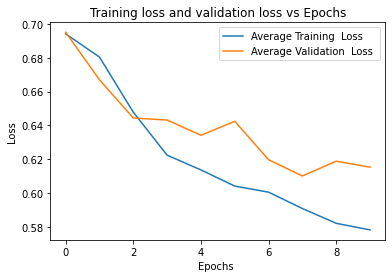

[0.2355656, 0.7423487, 0.23121773, 0.25787696, 0.25738966, 0.42533097, 0.38277465, 0.22475913, 0.34267148, 0.22366305, 0.26287672, 0.28343976, 0.5200478, 0.24603267, 0.74290484, 0.7412649, 0.735109, 0.23259228, 0.7367593, 0.2699068, 0.45080963, 0.2495075, 0.31003365, 0.26061085, 0.7427429, 0.33979505, 0.2731706, 0.23398197, 0.23981906, 0.3110926, 0.34462574, 0.2658484, 0.2605409, 0.63397706, 0.29496583, 0.2381264, 0.62696403, 0.23028788, 0.69489294, 0.59950393, 0.43440583, 0.32157218, 0.24417828, 0.39697292, 0.25753525, 0.74088675, 0.31640637, 0.60300326, 0.742489, 0.2747179, 0.34373152, 0.2747335, 0.58595616, 0.4457674, 0.49145034, 0.3504678, 0.4801968, 0.41690686, 0.35006863, 0.6720096, 0.60882616, 0.34517384, 0.7426924, 0.73904794, 0.30884853, 0.25839636, 0.33410412, 0.68507826, 0.28626156, 0.7131727, 0.41333458, 0.6236951, 0.3998569, 0.74219936, 0.74290025, 0.40456164, 0.742126, 0.74110174, 0.41104418, 0.72485924, 0.6043251, 0.7427861, 0.74160135, 0.74051374, 0.74232066, 0.7388238,

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
  0%|          | 0/118 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather tha

0 0.6965573966503144



 20%|██        | 2/10 [02:57<11:49, 88.74s/it]

1 0.6964690238237381



 30%|███       | 3/10 [04:26<10:21, 88.76s/it]

2 0.6948469787836075



 40%|████      | 4/10 [05:55<08:52, 88.76s/it]

3 0.6947372645139694



 50%|█████     | 5/10 [07:23<07:23, 88.77s/it]

4 0.6946881115436554



 60%|██████    | 6/10 [08:52<05:55, 88.78s/it]

5 0.6946480333805084



 70%|███████   | 7/10 [10:21<04:26, 88.87s/it]

6 0.6946243971586228



 80%|████████  | 8/10 [11:50<02:57, 88.85s/it]

7 0.6946142613887787



 90%|█████████ | 9/10 [13:19<01:28, 88.85s/it]

8 0.6945995151996612



100%|██████████| 10/10 [14:48<00:00, 88.83s/it]

9 0.694592073559761


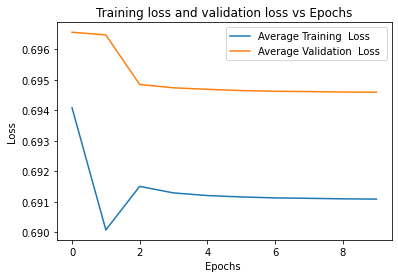

[0.46148208, 0.4614833, 0.46148285, 0.46148467, 0.46148387, 0.4614835, 0.46148404, 0.4614921, 0.46148425, 0.46148235, 0.46148452, 0.46148318, 0.46148244, 0.46148077, 0.4614828, 0.46148303, 0.46148404, 0.46148062, 0.46148193, 0.46148092, 0.46148166, 0.4614807, 0.46148172, 0.46148098, 0.46148157, 0.46148202, 0.46148187, 0.4614813, 0.46148238, 0.46148172, 0.461481, 0.46148285, 0.46148336, 0.46148127, 0.46148264, 0.4614804, 0.46148092, 0.46148142, 0.46148568, 0.4614825, 0.4614802, 0.46148238, 0.46148163, 0.46148628, 0.46148437, 0.46148252, 0.46148354, 0.46148258, 0.46148235, 0.4614844, 0.46148252, 0.46148267, 0.46148273, 0.4614815, 0.46148223, 0.46148336, 0.4614803, 0.4614815, 0.4614851, 0.46148416, 0.46148473, 0.4614844, 0.46148387, 0.46148, 0.46148136, 0.46148115, 0.46148387, 0.4614861, 0.46148404, 0.46148527, 0.46148518, 0.46148634, 0.4614844, 0.4614844, 0.46148416, 0.46148613, 0.46148404, 0.4614854, 0.4614844, 0.4614836, 0.46148568, 0.46148548, 0.4614844, 0.46148446, 0.46148446, 0.4614

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Some weights of the model checkpoint at distilbert-base-uncased wer

0 0.6978590339422226



 20%|██        | 2/10 [02:57<11:49, 88.73s/it]

1 0.6978228509426116



 30%|███       | 3/10 [04:26<10:20, 88.71s/it]

2 0.6978241950273514



 40%|████      | 4/10 [05:54<08:52, 88.72s/it]

3 0.6978242307901382



 50%|█████     | 5/10 [07:23<07:23, 88.72s/it]

4 0.6978252947330474



 60%|██████    | 6/10 [08:52<05:54, 88.72s/it]

5 0.6978263348340988



 70%|███████   | 7/10 [10:21<04:26, 88.73s/it]

6 0.6976397693157196



 80%|████████  | 8/10 [11:49<02:57, 88.72s/it]

7 0.694886389374733



 90%|█████████ | 9/10 [13:18<01:28, 88.77s/it]

8 0.6950031787157058



100%|██████████| 10/10 [14:47<00:00, 88.74s/it]

9 0.6941110014915466


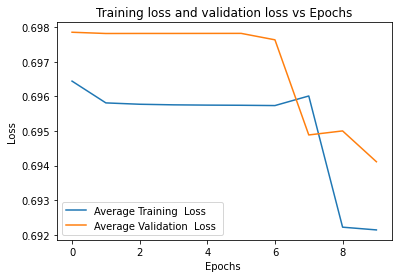

[0.46566254, 0.4656626, 0.4656626, 0.46566266, 0.4656627, 0.4656626, 0.46566266, 0.4656626, 0.46566266, 0.46566254, 0.4656626, 0.46566254, 0.46566254, 0.46566254, 0.46566254, 0.46566254, 0.46566254, 0.46566254, 0.4656626, 0.46566254, 0.4656626, 0.46566254, 0.4656626, 0.4656626, 0.4656626, 0.46566254, 0.46566147, 0.46566254, 0.46566254, 0.46566188, 0.46566254, 0.46566254, 0.46566254, 0.4656626, 0.46566254, 0.46566254, 0.4656626, 0.46566254, 0.4656626, 0.46566254, 0.4656626, 0.4656626, 0.46566254, 0.46566254, 0.46566254, 0.46566254, 0.46566254, 0.4656626, 0.4656626, 0.46566254, 0.46566254, 0.46566254, 0.4656626, 0.46566254, 0.46566254, 0.46566254, 0.46566254, 0.4656626, 0.46566254, 0.4656626, 0.4656626, 0.46566254, 0.46566254, 0.4656626, 0.4656626, 0.46566254, 0.46566254, 0.46566206, 0.46566254, 0.46566254, 0.46566254, 0.46566248, 0.46566224, 0.46566218, 0.46566254, 0.46566254, 0.46566254, 0.4656617, 0.46566254, 0.46566254, 0.46566254, 0.46566206, 0.4656615, 0.46566254, 0.46566254, 0.465

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Some weights of the model checkpoint at distilbert-base-uncased wer

0 0.7007661491632462



 20%|██        | 2/10 [02:57<11:50, 88.79s/it]

1 0.6985126823186875



 30%|███       | 3/10 [04:26<10:22, 88.87s/it]

2 0.7025712311267853



 40%|████      | 4/10 [05:55<08:53, 88.97s/it]

3 0.6941705256700516



 50%|█████     | 5/10 [07:24<07:24, 88.94s/it]

4 0.6994564771652222



 60%|██████    | 6/10 [08:53<05:55, 88.91s/it]

5 0.6977017998695374



 70%|███████   | 7/10 [10:22<04:26, 88.88s/it]

6 0.694152119755745



 80%|████████  | 8/10 [11:51<02:57, 88.88s/it]

7 0.696746876835823



 90%|█████████ | 9/10 [13:19<01:28, 88.87s/it]

8 0.6931711584329605



100%|██████████| 10/10 [14:48<00:00, 88.88s/it]

9 0.694238030910492


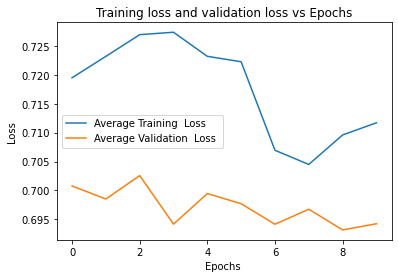

[0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472, 0.4647472

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
lr_lst = [0.0003, 1e-3, 1e-2, 1e-1]
for lr in lr_lst:
    print("---------------------------------------------------------------------")
    print(f"\n\nModel with learning rate : {lr} and optimizer : AdamW")
    model_bert = DistilBertModel.from_pretrained('distilbert-base-uncased').to(device)
    for param in model_bert.parameters():
      param.requires_grad = False
    my_net=Net(model_bert).to(device)
    opt = optim.AdamW(my_net.parameters(),lr=lr)
    train_loss, val_loss = fit(10, my_net, train_loader, val_loader, opt)
    plot_loss(train_loss, val_loss)
    accuracy(test_encoding,np.array(test_df['Binary labels'].values),my_net)


---------------------------------------------------------------------


Model with learning rate : 0.0003 and optimizer : SGD


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
  0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than

0 0.6931443035602569


 20%|██        | 2/10 [02:43<10:53, 81.63s/it]

1 0.6931292176246643


 30%|███       | 3/10 [04:04<09:31, 81.70s/it]

2 0.6931200146675109


 40%|████      | 4/10 [05:26<08:10, 81.74s/it]

3 0.6931160151958465


 50%|█████     | 5/10 [06:48<06:49, 81.80s/it]

4 0.6931166410446167


 60%|██████    | 6/10 [08:10<05:27, 81.83s/it]

5 0.6931212931871414


 70%|███████   | 7/10 [09:32<04:05, 81.87s/it]

6 0.6931294918060302


 80%|████████  | 8/10 [10:54<02:43, 81.85s/it]

7 0.6931407511234283


 90%|█████████ | 9/10 [12:16<01:21, 81.83s/it]

8 0.6931546688079834


100%|██████████| 10/10 [13:37<00:00, 81.79s/it]

9 0.6931708753108978


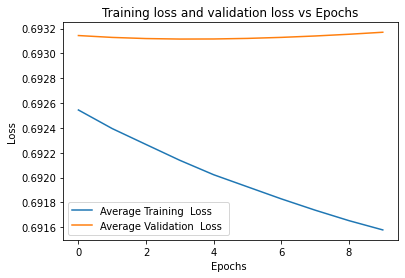

[0.484946, 0.48228985, 0.4825001, 0.48248357, 0.4831115, 0.48298287, 0.48222336, 0.48252025, 0.48257017, 0.48378325, 0.48366687, 0.48380148, 0.48462674, 0.48437646, 0.4839328, 0.48581386, 0.48408902, 0.48399115, 0.48441702, 0.48506144, 0.4834207, 0.48417294, 0.48428497, 0.4848579, 0.48376784, 0.48436964, 0.48395663, 0.48472443, 0.4839897, 0.48487926, 0.48550865, 0.48495567, 0.48441765, 0.48376885, 0.4850185, 0.4853476, 0.4842124, 0.48421106, 0.48229617, 0.48301864, 0.48339084, 0.48388538, 0.4832085, 0.48315653, 0.48569712, 0.48464686, 0.48363113, 0.48492146, 0.4858206, 0.4857873, 0.4836138, 0.4849309, 0.48384118, 0.48554412, 0.48479137, 0.48276728, 0.48417383, 0.48356616, 0.4833418, 0.48219502, 0.48244894, 0.4827094, 0.4817777, 0.48379955, 0.4838415, 0.4841866, 0.48256806, 0.4844561, 0.48372287, 0.48357442, 0.48360574, 0.48348087, 0.48385614, 0.4841222, 0.483569, 0.48442525, 0.48305747, 0.48302588, 0.48409605, 0.48447454, 0.4835714, 0.48281702, 0.4833288, 0.48395607, 0.4829127, 0.48403

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Some weights of the model checkpoint at distilbert-base-uncased wer

0 0.6963382214307785


 20%|██        | 2/10 [02:43<10:52, 81.60s/it]

1 0.6950326561927795


 30%|███       | 3/10 [04:04<09:30, 81.51s/it]

2 0.6941611438989639


 40%|████      | 4/10 [05:26<08:08, 81.48s/it]

3 0.693596425652504


 50%|█████     | 5/10 [06:47<06:47, 81.42s/it]

4 0.6932467192411422


 60%|██████    | 6/10 [08:08<05:25, 81.38s/it]

5 0.6930465042591095


 70%|███████   | 7/10 [09:29<04:03, 81.33s/it]

6 0.6929492294788361


 80%|████████  | 8/10 [10:51<02:42, 81.33s/it]

7 0.6929212898015976


 90%|█████████ | 9/10 [12:12<01:21, 81.32s/it]

8 0.6929391145706176


100%|██████████| 10/10 [13:33<00:00, 81.40s/it]

9 0.6929860413074493


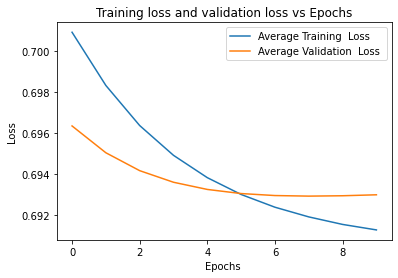

[0.4826192, 0.48352915, 0.48377967, 0.48326352, 0.48362193, 0.48486862, 0.48428017, 0.48227215, 0.4839076, 0.48271322, 0.48268446, 0.48294106, 0.4835955, 0.4824515, 0.48232, 0.48308563, 0.48335955, 0.48304424, 0.48289585, 0.48286718, 0.48275635, 0.48246214, 0.48293394, 0.4815315, 0.48368004, 0.48292866, 0.48365706, 0.48327744, 0.4827044, 0.48264152, 0.4830182, 0.48237082, 0.48249078, 0.4834465, 0.4834158, 0.48388466, 0.48222795, 0.48260593, 0.48145896, 0.4820271, 0.48101747, 0.48332483, 0.48201045, 0.4824071, 0.4838183, 0.48286617, 0.48169437, 0.4836488, 0.4834596, 0.48381808, 0.48307517, 0.48360017, 0.48295063, 0.48304224, 0.4839073, 0.48396355, 0.48418725, 0.48440006, 0.48518735, 0.4846906, 0.48622948, 0.4858251, 0.48546198, 0.48373047, 0.48471177, 0.48468488, 0.4838465, 0.48343205, 0.48357108, 0.48400062, 0.4833788, 0.4847484, 0.4843189, 0.48479888, 0.48436987, 0.48441428, 0.48417363, 0.4848039, 0.48394004, 0.48449123, 0.4839334, 0.4854214, 0.4844539, 0.48238164, 0.48367116, 0.48409

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Some weights of the model checkpoint at distilbert-base-uncased wer

0 0.6929248362779618


 20%|██        | 2/10 [02:43<10:54, 81.78s/it]

1 0.6934202551841736


 30%|███       | 3/10 [04:05<09:32, 81.84s/it]

2 0.6934981018304824


 40%|████      | 4/10 [05:27<08:11, 81.86s/it]

3 0.6934197843074799


 50%|█████     | 5/10 [06:49<06:49, 81.82s/it]

4 0.6932948976755142


 60%|██████    | 6/10 [08:10<05:27, 81.85s/it]

5 0.6931530207395553


 70%|███████   | 7/10 [09:32<04:05, 81.88s/it]

6 0.6929936021566391


 80%|████████  | 8/10 [10:54<02:43, 81.89s/it]

7 0.6928166419267654


 90%|█████████ | 9/10 [12:16<01:21, 81.92s/it]

8 0.6926104873418808


100%|██████████| 10/10 [13:38<00:00, 81.89s/it]

9 0.6923679739236832


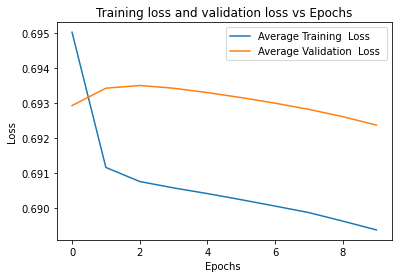

[0.46297055, 0.4765759, 0.47242835, 0.47021776, 0.47046947, 0.47490242, 0.47381037, 0.47013128, 0.47215712, 0.4688655, 0.47171855, 0.4718824, 0.4685174, 0.46637806, 0.46911404, 0.46923274, 0.47039717, 0.4662234, 0.47150248, 0.46631175, 0.4687977, 0.46575293, 0.46805185, 0.4632603, 0.47487575, 0.46854508, 0.46985957, 0.46380278, 0.46256414, 0.46908933, 0.46570018, 0.46429083, 0.46894395, 0.4681009, 0.46791792, 0.46445814, 0.4702961, 0.46082836, 0.47014445, 0.4710111, 0.46649152, 0.46854383, 0.46490055, 0.46852368, 0.46617207, 0.46752402, 0.46671882, 0.46635464, 0.46694246, 0.46599537, 0.4656977, 0.4659584, 0.4698996, 0.46368977, 0.46886218, 0.468262, 0.46879214, 0.46901542, 0.47070923, 0.4727863, 0.47505668, 0.47316736, 0.4759834, 0.47013944, 0.4703608, 0.4686788, 0.47020206, 0.47150078, 0.46857733, 0.47162345, 0.46949637, 0.47392538, 0.47035065, 0.4728155, 0.46968028, 0.46857816, 0.47225043, 0.4740265, 0.46765915, 0.46878347, 0.47053206, 0.47388065, 0.47217035, 0.4699892, 0.47321317, 0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Some weights of the model checkpoint at distilbert-base-uncased wer

0 0.6931100010871887


 20%|██        | 2/10 [02:43<10:54, 81.87s/it]

1 0.6922172486782074


 30%|███       | 3/10 [04:05<09:32, 81.85s/it]

2 0.6910904020071029


 40%|████      | 4/10 [05:27<08:11, 81.86s/it]

3 0.6734355926513672


 50%|█████     | 5/10 [06:49<06:49, 81.90s/it]

4 0.662697947025299


 60%|██████    | 6/10 [08:11<05:27, 81.94s/it]

5 0.6539470583200455


 70%|███████   | 7/10 [09:33<04:05, 81.97s/it]

6 0.6507650047540665


 80%|████████  | 8/10 [10:55<02:43, 81.95s/it]

7 0.6505523175001144


 90%|█████████ | 9/10 [12:17<01:21, 81.89s/it]

8 0.6442460119724274


100%|██████████| 10/10 [13:39<00:00, 81.90s/it]

9 0.6468738287687301


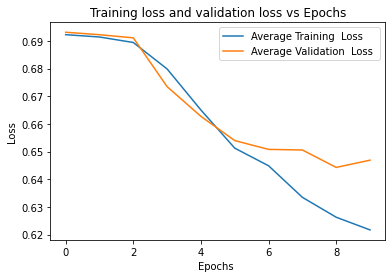

[0.34226036, 0.7302085, 0.70396733, 0.63824505, 0.5359605, 0.71852267, 0.715666, 0.59307534, 0.6299318, 0.26037604, 0.32614496, 0.5183608, 0.47008064, 0.5528597, 0.6822002, 0.7322, 0.6938333, 0.4341259, 0.70061517, 0.33081785, 0.43267527, 0.25843924, 0.4674626, 0.26936635, 0.730968, 0.3944358, 0.38442194, 0.3382756, 0.296381, 0.43327206, 0.3791436, 0.3520478, 0.30150938, 0.7011287, 0.5597708, 0.30013245, 0.66758436, 0.2555877, 0.68806666, 0.69555086, 0.63583666, 0.67654335, 0.42509213, 0.6564727, 0.42441714, 0.6627972, 0.68967396, 0.37715113, 0.47309995, 0.43379867, 0.7057968, 0.63153905, 0.66364825, 0.40290725, 0.6496428, 0.5589104, 0.68544227, 0.59433115, 0.64175606, 0.6951349, 0.7076347, 0.65433186, 0.7279245, 0.72600085, 0.56556237, 0.46509522, 0.53893787, 0.6016391, 0.6654496, 0.7292325, 0.70708984, 0.7242514, 0.7113088, 0.70922464, 0.73666006, 0.6312748, 0.7294522, 0.7369021, 0.6649253, 0.623113, 0.7298262, 0.73356044, 0.73299164, 0.7277191, 0.73367333, 0.65734786, 0.7238864, 0.7

In [ ]:
lr_lst = [0.0003, 1e-3, 1e-2, 1e-1]
for lr in lr_lst:
    print("---------------------------------------------------------------------")
    print(f"\n\nModel with learning rate : {lr} and optimizer : SGD")
    model_bert = DistilBertModel.from_pretrained('distilbert-base-uncased').to(device)
    for param in model_bert.parameters():
      param.requires_grad = False
    my_net=Net(model_bert).to(device)
    opt = optim.SGD(my_net.parameters(),lr=lr)
    train_loss, val_loss = fit(10, my_net, train_loader, val_loader, opt)
    plot_loss(train_loss, val_loss)
    accuracy(test_encoding,np.array(test_df['Binary labels'].values),my_net)
